## Data manipulation

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv(r'estat_crim_off_cat.tsv', sep='\t')

In [13]:
data = data.rename({data.columns[0]: data.columns[0].replace(r"\TIME_PERIOD", "")}, axis="columns")
split_name_columns = (data.columns[0]).split(',')
count_split_columns = len(split_name_columns)

In [14]:
data[split_name_columns] = data[data.columns[0]].str.split(',', expand=True)
data = data.drop(data.columns[0], axis="columns") #odstraneni jiz rozdeleneho sloupce

%run add_info.ipynb
data = data.merge(geo_df, how='left', on='geo')
data = data.merge(iccs_df, how='left', on='iccs')
data = data.drop(columns=['geo', 'iccs'])


In [15]:
data

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,unit,country_name,crime_info
0,88,82,118,124,125,107,98,54,71,52,51,58,52,61,42,A,NR,Albania,Intentional homicide
1,58,51,61,80,88,63,43,42,49,61,73,74,54,59,65,A,NR,Austria,Intentional homicide
2,66,67,54,49,60,46,49,56,42,34,36,37,42,31,34,A,NR,Bosnia and Herzegovina,Intentional homicide
3,204,189,189,214,206,204,210,231,175,198,192,147,150,154,179,A,NR,Belgium,Intentional homicide
4,172,150,148,128,141,109,112,126,79,95,92,81,67,89,76,A,NR,Bulgaria,Intentional homicide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,:,:,:,:,:,:,:,:,:,0.00,:,:,:,:,:,A,P_HTHAB,Serbia,Participation in an organized criminal group
1554,:,:,:,:,:,:,:,:,0.05,0.05,0.19,0.24,0.05,0.19,0.00,A,P_HTHAB,Slovenia,Participation in an organized criminal group
1555,:,:,:,:,:,:,:,:,0.11,0.11,0.17,0.11,0.18,0.26,0.15,A,P_HTHAB,Slovakia,Participation in an organized criminal group
1556,:,:,:,:,:,:,:,:,8.44,:,:,:,:,:,:,A,P_HTHAB,Türkiye,Participation in an organized criminal group


In [16]:
# presun rozdelenych a naparovaných udaju  na zacatek df
reorg_columns = data.columns.tolist()
final_reorg_columns = reorg_columns[-count_split_columns:] + reorg_columns[:-count_split_columns]
data = data[final_reorg_columns]

In [17]:
data

,freq,unit,country_name,crime_info,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,NR,Albania,Intentional homicide,88,82,118,124,125,107,98,54,71,52,51,58,52,61,42
1,A,NR,Austria,Intentional homicide,58,51,61,80,88,63,43,42,49,61,73,74,54,59,65
2,A,NR,Bosnia and Herzegovina,Intentional homicide,66,67,54,49,60,46,49,56,42,34,36,37,42,31,34
3,A,NR,Belgium,Intentional homicide,204,189,189,214,206,204,210,231,175,198,192,147,150,154,179
4,A,NR,Bulgaria,Intentional homicide,172,150,148,128,141,109,112,126,79,95,92,81,67,89,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,A,P_HTHAB,Serbia,Participation in an organized criminal group,:,:,:,:,:,:,:,:,:,0.00,:,:,:,:,:
1554,A,P_HTHAB,Slovenia,Participation in an organized criminal group,:,:,:,:,:,:,:,:,0.05,0.05,0.19,0.24,0.05,0.19,0.00
1555,A,P_HTHAB,Slovakia,Participation in an organized criminal group,:,:,:,:,:,:,:,:,0.11,0.11,0.17,0.11,0.18,0.26,0.15
1556,A,P_HTHAB,Türkiye,Participation in an organized criminal group,:,:,:,:,:,:,:,:,8.44,:,:,:,:,:,:


In [18]:
data = data.replace(": ", 'NaN')

column_period = data.columns[count_split_columns:] 
data[column_period] = data[data.columns[count_split_columns:]].astype('float')

In [19]:
no_anual = data[data['freq'] != 'A'].index # podminka, ze se nejedna o rocni data
data.drop(index=no_anual, inplace=True)

no_p_hthab = data[data['unit'] != 'P_HTHAB'].index # podminka, ze se nejedna o udaj na 100tis obyvatel
data.drop(index=no_p_hthab, inplace=True)
data

,freq,unit,country_name,crime_info,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
41,A,P_HTHAB,Albania,Intentional homicide,2.78,2.57,NaN,4.38,NaN,NaN,3.38,1.86,2.46,1.81,1.78,2.03,1.83,2.16,1.50
42,A,P_HTHAB,Austria,Intentional homicide,0.70,0.61,0.73,0.96,1.05,0.75,0.51,0.49,0.56,0.70,0.83,0.84,0.61,0.66,0.72
43,A,P_HTHAB,Bosnia and Herzegovina,Intentional homicide,1.72,1.74,1.40,1.27,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,A,P_HTHAB,Belgium,Intentional homicide,1.91,1.76,1.74,1.95,1.86,1.83,1.88,2.06,1.55,1.74,1.68,1.28,1.30,1.33,1.54
45,A,P_HTHAB,Bulgaria,Intentional homicide,2.29,2.01,1.99,1.74,1.92,1.50,1.55,1.75,1.10,1.34,1.30,1.16,0.96,1.29,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,A,P_HTHAB,Serbia,Participation in an organized criminal group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1554,A,P_HTHAB,Slovenia,Participation in an organized criminal group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,0.19,0.24,0.05,0.19,0.00
1555,A,P_HTHAB,Slovakia,Participation in an organized criminal group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.11,0.17,0.11,0.18,0.26,0.15
1556,A,P_HTHAB,Türkiye,Participation in an organized criminal group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
years_list = data.columns[count_split_columns:]
info_list = data.columns[:count_split_columns]

In [21]:
unpivot_data = pd.melt(data, id_vars=info_list, value_vars=years_list, var_name='year', value_name='value')
unpivot_data['year'] = unpivot_data['year'].astype('int')
unpivot_data

,freq,unit,country_name,crime_info,year,value
0,A,P_HTHAB,Albania,Intentional homicide,2008,2.78
1,A,P_HTHAB,Austria,Intentional homicide,2008,0.70
2,A,P_HTHAB,Bosnia and Herzegovina,Intentional homicide,2008,1.72
3,A,P_HTHAB,Belgium,Intentional homicide,2008,1.91
4,A,P_HTHAB,Bulgaria,Intentional homicide,2008,2.29
...,...,...,...,...,...,...
11605,A,P_HTHAB,Serbia,Participation in an organized criminal group,2022,NaN
11606,A,P_HTHAB,Slovenia,Participation in an organized criminal group,2022,0.00
11607,A,P_HTHAB,Slovakia,Participation in an organized criminal group,2022,0.15
11608,A,P_HTHAB,Türkiye,Participation in an organized criminal group,2022,NaN


## Data visualisation

In [26]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [27]:
unpivot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   freq          11610 non-null  object 
 1   unit          11610 non-null  object 
 2   country_name  11610 non-null  object 
 3   crime_info    11610 non-null  object 
 4   year          11610 non-null  int64  
 5   value         8605 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 544.3+ KB


In [28]:
# TODO: zoptimalizovat kod a zinteraktivnit ploty

In [29]:
# widgetou si vybrat stát
# vybraný stát (proměnnou z widgety) poslat do funkce, která doplní info do další proměnné a vygeneruje graf
# lze wigety spouštet z jiného notebooku, aby nebyl  vidět kod? 

In [64]:
country_list_sorted = sorted(list(set(unpivot_data['country_name'].tolist())))
crime_list_sorted = sorted(list(set(unpivot_data['crime_info'].tolist())))

In [68]:
country = widgets.Dropdown(
    options=country_list_sorted,
    value=country_list_sorted[0],
    description='Country:',
    disabled=False,
)

In [69]:
crime = widgets.Dropdown(
    options=crime_list_sorted,
    value=crime_list_sorted[0],
    description='Crime:',
    disabled=False,
)

In [67]:
display(country)
display(crime)

Dropdown(description='Country:', options=('Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria…

Dropdown(description='Crime:', options=('Acts against computer systems', 'Attempted intentional homicide', 'Br…

In [62]:
filtered_data = unpivot_data[(unpivot_data['country_name'] == country.value) & (unpivot_data['crime_info'] == crime.value)]

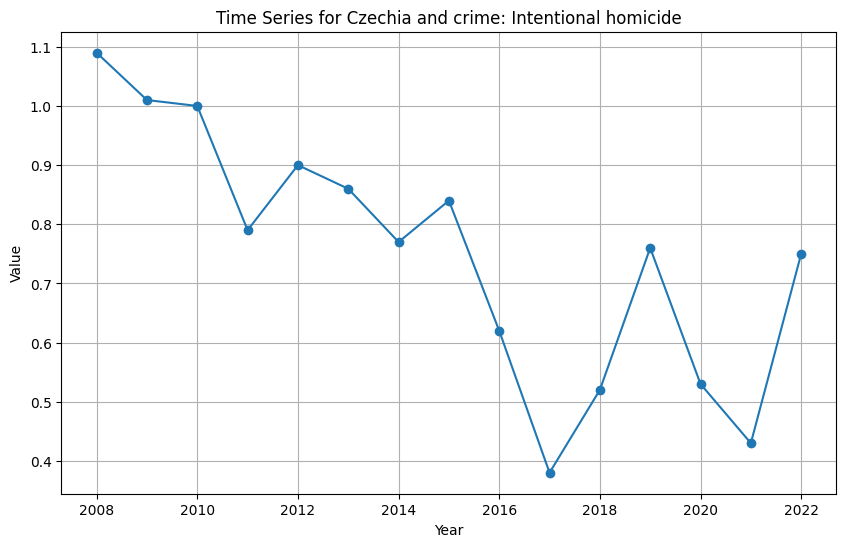

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['year'], filtered_data['value'], marker='o')
plt.title(f"Time Series for {country.value} and crime: {crime.value}")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()